In [1]:
# importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
pd.options.display.max_rows=None
import warnings
warnings.filterwarnings(action='once')

In [173]:
df=pd.read_csv('car_price.csv',index_col=0)

In [98]:
df.shape

(301, 8)

In [4]:
df.shape

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(301, 8)

In [99]:
#Exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, ritz to brio
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.2+ KB


In [100]:
# checking the null values.
df.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#Explorating data 

In [101]:
# checking the variables datatypes:
for i in df.select_dtypes('number').columns:
    print(i)

Year
Selling_Price
Present_Price
Kms_Driven
Owner


In [42]:
for i in df.select_dtypes('number').columns:
    print(i)
    print('-------------')
    print(df[i].unique())

Year
-------------
[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
Selling_Price
-------------
[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  6.85  7.5
  6.1   2.25  7.75  3.25  2.65  4.9   4.4   2.5   2.9   3.    4.15  6.
  1.95  3.1   2.35  4.95  5.5   2.95  4.65  0.35  5.85  2.55  1.25  1.05
  5.8  14.9  23.   18.   16.    2.75  3.6   4.5   4.1  19.99  6.95 18.75
 23.5  33.   19.75  4.35 14.25  3.95  1.5   5.25 14.5  14.73 12.5   3.49
 35.    5.9   3.45  3.8  11.25  3.51  4.   20.75 17.    7.05  9.65  1.75
  1.7   1.65  1.45  1.35  1.2   1.15  1.11  1.1   1.    0.95  0.9   0.75
  0.8   0.78  0.72  0.65  0.6   0.55  0.52  0.51  0.5   0.48  0.45  0.42
  0.4   0.38  0.31  0.3   0.27  0.25  0.2   0.18  0.17  0.16  0.15  0.12
  0.1   5.75  5.15  7.9   4.85 11.75  3.15  6.45  3.5   8.25  5.11  2.7
  6.15 11.45  3.9   9.1   4.8   2.    5.35  6.25  5.95  5.2   3.75 12.9
  5.    5.4   7.2  10.25  8.5   8.4   9.15  6.6   3.65  8.35  6.7   5.3


C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Year
------------------------


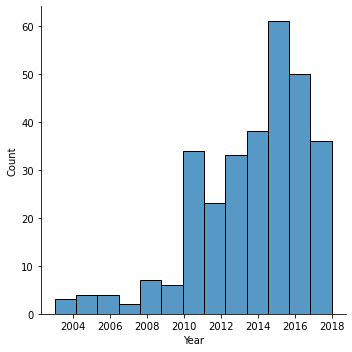

Selling_Price
------------------------


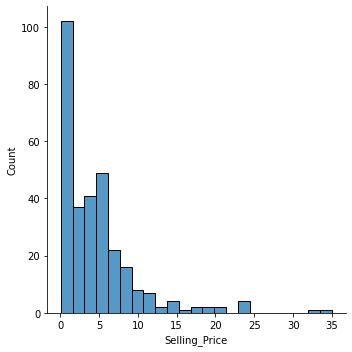

Present_Price
------------------------


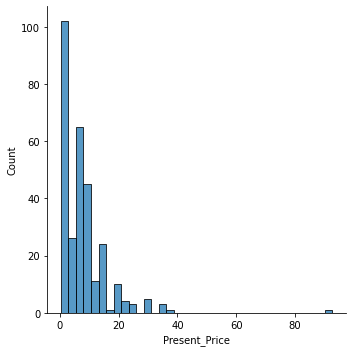

Kms_Driven
------------------------


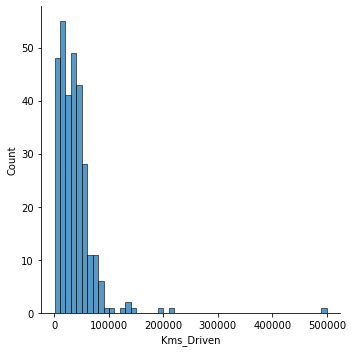

In [25]:
# checking the distribution of the data:
#-------------------------
for i in df.select_dtypes('number').columns[:-1]:
    print(i)
    print('------------------------')
    sns.displot(df[i])
    plt.show()

Checking the outliers
--

Year
------------------------


C:\Users\siva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


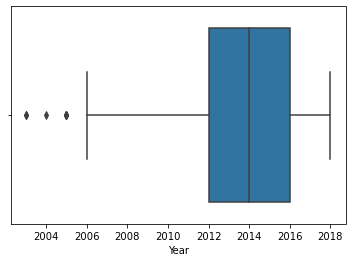

Selling_Price
------------------------


C:\Users\siva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


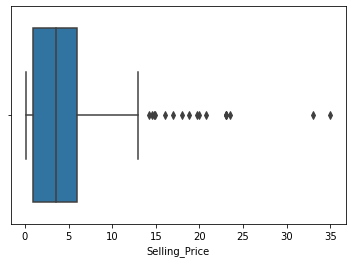

Present_Price
------------------------


C:\Users\siva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


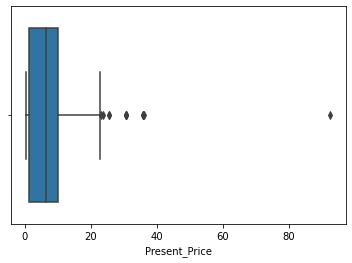

Kms_Driven
------------------------


C:\Users\siva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


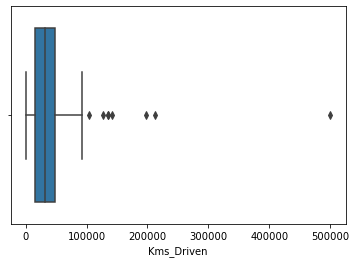

In [24]:
for i in df.select_dtypes('number').columns[:-1]:
    print(i)
    print('------------------------')
    sns.boxplot(df[i])
    plt.show()

<Figure size 1008x576 with 0 Axes>

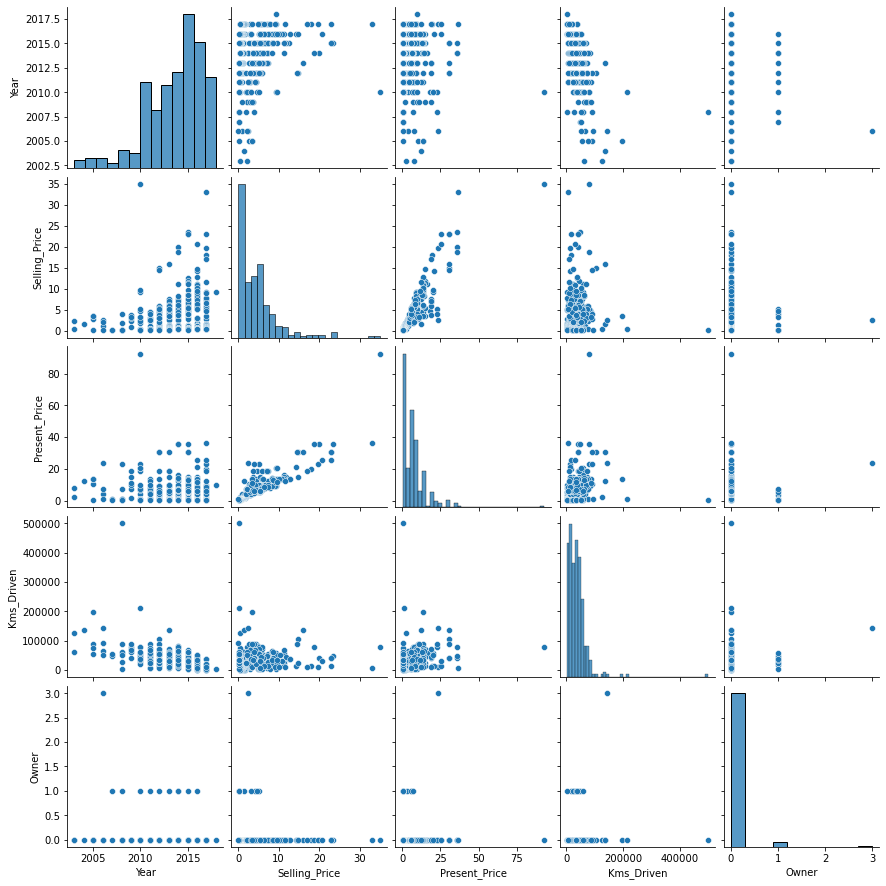

In [28]:
plt.figure(figsize=(14,8))
sns.pairplot(df.select_dtypes('number'))


In [102]:
df_encoaded=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

<Figure size 1008x576 with 0 Axes>

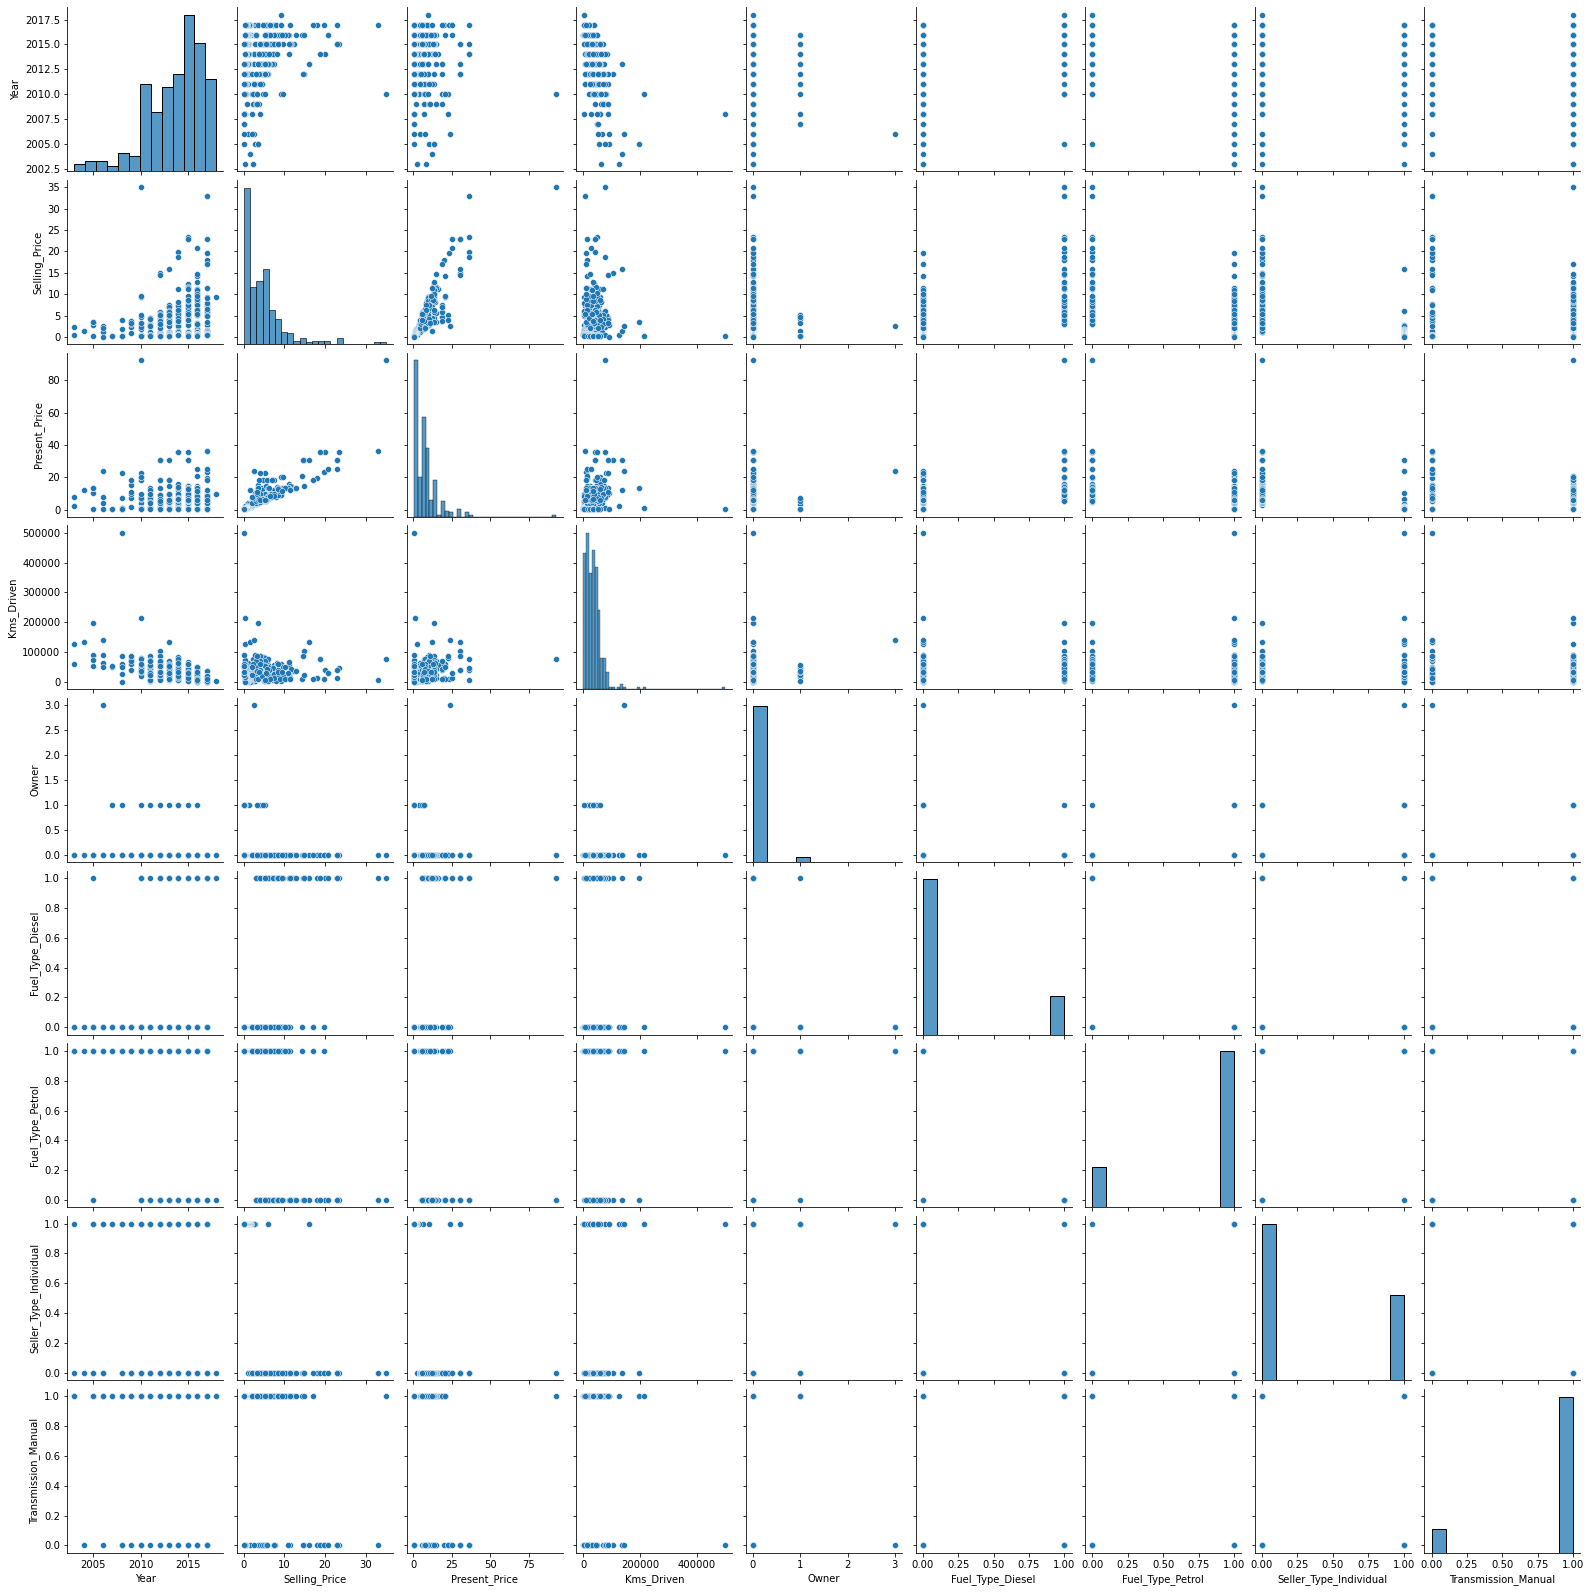

In [103]:
plt.figure(figsize=(14,8))
sns.pairplot(df_encoaded)


C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

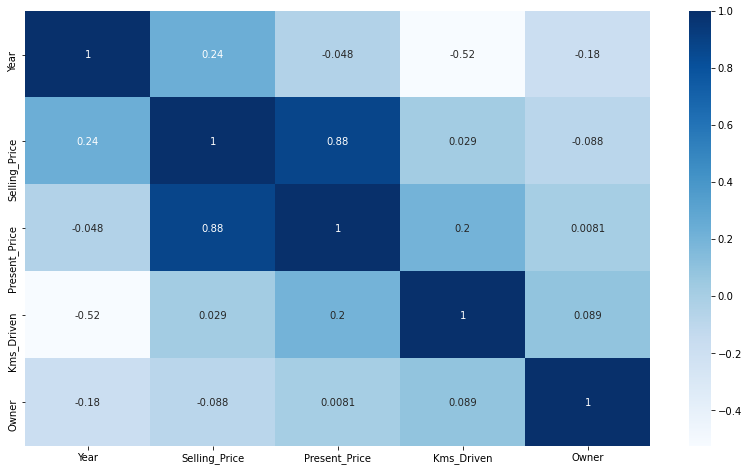

In [40]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')


In [106]:
df_encoaded.shape

(301, 9)

In [104]:
df.shape

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(301, 8)

Scalling the using the Z score
--

In [105]:
from scipy.stats import zscore

In [107]:
df_encoaded['Kms_Driven']=zscore(df_encoaded['Kms_Driven'])

In [108]:
df_encoaded.shape

(301, 9)

In [109]:
Xc=sm.add_constant(df_encoaded)
Xc=Xc.drop('Selling_Price',axis=1)
y=df_encoaded.loc[:,'Selling_Price']

In [111]:
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.71e-131
Time:                        23:30:43   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -789.4957     86.457     -9.132      0.000    -959.654    -619.337
Year                       0.3931      0.043      9.159      0.000       0.309       0.478
Present_Price              0.4372      0.016     27.355      0.000       0.406       0.469
Kms_Driven                -0.2723      0.125     -2.172      0.031      -0.519      -0.026
Owner                     -0.6742      0.423     -1.595      0.112      -1.506       0.158
Fuel_Type_Diesel           2.4699      1.278      1.932      0.054      -0.046       4.986
Fuel_Type_Petrol           0.6077      1.259      0.483      0.630      -1.870       3.085
Seller_Type_Individual    -1.1213      0.257     -4.371      0.000      -1.626      -0.616
Transmission_Manual       -1.4482      0.328     -4.417      0.000      -2.093      -0.803
==============================================================================
Omnibus:                       95.107   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.392
Skew:                           1.075   Prob(JB):                    6.03e-152
Kurtosis:                      10.135   Cond. No.                     1.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif=[vif(df_encoaded.values,i) for i in range(df_encoaded.shape[1])]
col=[i for i in df_encoaded.columns]

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
pd.DataFrame({'vif':vif},index=Xc.columns).T

,const,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
vif,165.529087,12.214043,9.482791,1.277646,1.090759,31.836062,121.554823,2.373537,9.600145


In [122]:
from datetime import date
todays_date = date.today()

In [130]:
import datetime
df_encoaded['age_of_car']=df_encoaded['Year'].astype('object')

In [138]:
todays_date.year

2021

In [140]:
df_encoaded['age_of_car']=df_encoaded['age_of_car'].apply(lambda x :todays_date.year-x)

In [142]:
Xc=sm.add_constant(df_encoaded)
Xc=Xc.drop(['Selling_Price','Fuel_Type_Petrol','Fuel_Type_Diesel','Year'],axis=1)
y=df_encoaded.loc[:,'Selling_Price']

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     318.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.86e-125
Time:                        23:42:42   Log-Likelihood:                -612.71
No. Observations:                 301   AIC:                             1239.
Df Residuals:                     294   BIC:                             1265.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.8668      0.504     11.649      0.000       4.876       6.858
Present_Price              0.4731      0.016     29.864      0.000       0.442       0.504
Kms_Driven                -0.1380      0.131     -1.052      0.293      -0.396       0.120
Owner                     -0.7436      0.449     -1.658      0.098      -1.627       0.139
Seller_Type_Individual    -1.2925      0.270     -4.791      0.000      -1.823      -0.762
Transmission_Manual       -1.2733      0.347     -3.672      0.000      -1.956      -0.591
age_of_car                -0.4372      0.045     -9.726      0.000      -0.526      -0.349
==============================================================================
Omnibus:                       85.264   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              777.438
Skew:                           0.857   Prob(JB):                    1.52e-169
Kurtosis:                      10.684   Cond. No.                         68.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing the insignificant variables
----

In [145]:
model.pvalues[model.pvalues>0.05]

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kms_Driven    0.293444
Owner         0.098444
dtype: float64

In [183]:
Xc=sm.add_constant(df_encoaded)
Xc=Xc.drop(['Selling_Price','Fuel_Type_Petrol','Fuel_Type_Diesel','Year','Owner','Kms_Driven'],axis=1)
y=df_encoaded.loc[:,'Selling_Price']

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     379.5
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          3.56e-126
Time:                        00:06:20   Log-Likelihood:                -614.11
No. Observations:                 301   AIC:                             1240.
Df Residuals:                     295   BIC:                             1262.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.2548      0.513     12.197      0.000       5.246       7.264
Present_Price              0.4717      0.016     29.730      0.000       0.441       0.503
Seller_Type_Individual    -1.3513      0.268     -5.038      0.000      -1.879      -0.823
Transmission_Manual       -1.2527      0.348     -3.605      0.000      -1.937      -0.569
age_of_car                -0.4485      0.045    -10.063      0.000      -0.536      -0.361
Km_scalled                -0.1953      0.188     -1.039      0.300      -0.565       0.175
==============================================================================
Omnibus:                       83.325   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              776.869
Skew:                           0.821   Prob(JB):                    2.02e-169
Kurtosis:                      10.697   Cond. No.                         70.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Scalling the Kilometer driven with min max scaller
--

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [180]:
scaller=MinMaxScaler(feature_range=(1,10))
df_encoaded['Km_scalled']=scaller.fit_transform(df[['Kms_Driven']])

In [181]:
df_encoaded['Km_scalled']

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Car_Name
ritz                          1.477477
sx4                           1.765766
ciaz                          1.115315
wagon r                       1.084685
swift                         1.755856
vitara brezza                 1.028306
ciaz                          1.329658
s cross                       1.593315
ciaz                          1.356270
ciaz                          1.754360
alto 800                      1.029459
ciaz                          1.909910
ciaz                          1.261261
ertiga                        1.459459
dzire                         2.386072
ertiga                        1.765766
ertiga                        1.741946
ertiga                        1.765766
wagon r                       1.630631
sx4                           1.737694
alto k10                      1.441441
ignis                         1.034234
sx4                           1.891892
alto k10                      1.806847
wagon r                       2.015838
swift           

In [187]:
Xc=sm.add_constant(df_encoaded)
Xc=Xc.drop(['Selling_Price','Fuel_Type_Petrol','Fuel_Type_Diesel','Year','Owner','Kms_Driven'],axis=1)
y=df_encoaded.loc[:,'Selling_Price']

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     379.5
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          3.56e-126
Time:                        00:10:58   Log-Likelihood:                -614.11
No. Observations:                 301   AIC:                             1240.
Df Residuals:                     295   BIC:                             1262.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.2548      0.513     12.197      0.000       5.246       7.264
Present_Price              0.4717      0.016     29.730      0.000       0.441       0.503
Seller_Type_Individual    -1.3513      0.268     -5.038      0.000      -1.879      -0.823
Transmission_Manual       -1.2527      0.348     -3.605      0.000      -1.937      -0.569
age_of_car                -0.4485      0.045    -10.063      0.000      -0.536      -0.361
Km_scalled                -0.1953      0.188     -1.039      0.300      -0.565       0.175
==============================================================================
Omnibus:                       83.325   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              776.869
Skew:                           0.821   Prob(JB):                    2.02e-169
Kurtosis:                      10.697   Cond. No.                         70.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

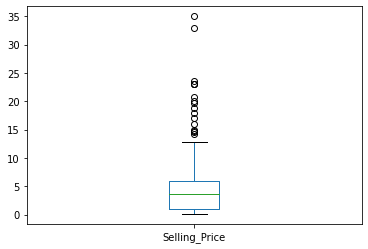

In [189]:
y.plot(kind='box')

we can see there are lot of outliers in the Target varibale so let transform the and try to perform the model creation
--

In [193]:
df_encoaded['Selling_Price']=df_encoaded['Selling_Price'].apply(np.sqrt)

In [198]:
Xc=sm.add_constant(df_encoaded)
Xc=Xc.drop(['Selling_Price','Fuel_Type_Petrol','Fuel_Type_Diesel','Year','Owner','Kms_Driven','Km_scalled'],axis=1)
y=df_encoaded.loc[:,'Selling_Price']

In [199]:
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     685.4
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          2.95e-148
Time:                        00:19:30   Log-Likelihood:                -91.690
No. Observations:                 301   AIC:                             193.4
Df Residuals:                     296   BIC:                             211.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.5248      0.085     29.668      0.000       2.357       2.692
Present_Price              0.0742      0.003     26.695      0.000       0.069       0.080
Seller_Type_Individual    -0.9192      0.047    -19.509      0.000      -1.012      -0.826
Transmission_Manual       -0.1569      0.061     -2.589      0.010      -0.276      -0.038
age_of_car                -0.1011      0.007    -15.230      0.000      -0.114      -0.088
==============================================================================
Omnibus:                       63.184   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              596.480
Skew:                          -0.503   Prob(JB):                    2.99e-130
Kurtosis:                       9.823   Cond. No.                         67.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [203]:
df_encoaded.head()

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age_of_car,Km_scalled
Car_Name,,,,,,,,,,,
ritz,2014,1.830301,5.59,-0.256224,0,0,1,0,1,7,1.477477
sx4,2013,2.179449,9.54,0.155911,0,1,0,0,1,8,1.765766
ciaz,2017,2.692582,9.85,-0.773969,0,0,1,0,1,4,1.115315
wagon r,2011,1.688194,4.15,-0.817758,0,0,1,0,1,10,1.084685
swift,2014,2.144761,6.87,0.141743,0,1,0,0,1,7,1.755856


In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics.regression import r2_score,mean_squared_error

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\siva\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [208]:
X=Xc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [209]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(210, 5) (91, 5) (210,) (91,)


In [212]:
lir=LinearRegression()

In [214]:
lir=lir.fit(X_train,y_train)
y_train_pred = lir.predict(X_train)


C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [215]:
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [216]:
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print('r2-Train: ', r2_train, 'rmse_Train: ', rmse_train)


y_test_pred = lir.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2-Test: ', r2_test, 'rmse_Test: ', rmse_test)

r2-Train:  0.891626755978777 rmse_Train:  0.3393334002330909
r2-Test:  0.9207218685274051 rmse_Test:  0.30864804026205617


C:\Users\siva\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
